In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색

In [30]:
import os
import sys
import urllib.request
import pandas as pd
import json
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [31]:
client_id = "c3IscpJm_c4tcHI0dp2x"
client_secret = "a1aZB7Uw_7"
ls=['인공지능','머신러닝','AI','메타버스']

res=[]
for i in ls:
    encText = urllib.parse.quote(i)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        json_obj=json.loads(response_body)
        total=json_obj['total']
        res.append(total)
    #     print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)
print(res)

[1485126, 148977, 1917434, 247966]


In [32]:
res

[1485126, 148977, 1917434, 247966]

In [34]:
df=pd.Series(res,index=ls)

<AxesSubplot:>

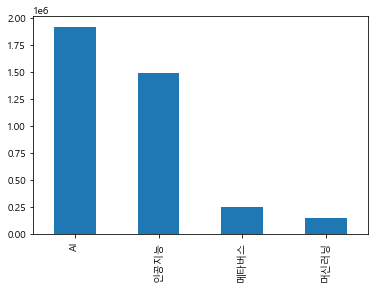

In [40]:
df.sort_values(ascending=False).plot(kind='bar')